In [1]:
import tensorflow as tf
from tensorflow import keras as k
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import cv2

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation
from keras.optimizers import SGD,Adam
from keras.preprocessing.image import ImageDataGenerator as ig
from keras import optimizers
import scipy
import pylab
import matplotlib.cm as cm

Using TensorFlow backend.


In [2]:
test=r'C:\Users\mishr\CNN\AUGUMENTED\TEST'
train=r'C:\Users\mishr\CNN\AUGUMENTED\TRAIN'

In [3]:
#using flow_from_directory() function to load my images into the notebook
# my images are in greyscale so i'll simply resize all the lot to an uniform size

datagen = ig(rescale=1.0/255.0)
# preparing the iterators
training = datagen.flow_from_directory(train,class_mode='categorical',color_mode="grayscale", batch_size=25, target_size=(200, 200))
testing= datagen.flow_from_directory(test,class_mode='categorical',color_mode="grayscale", batch_size=25, target_size=(200, 200))

Found 1740 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [4]:
#building the model layout
model=Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',name="LAYER_1", kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu',name="LAYER_2" ,kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',name="LAYER_3" ,kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',name="HIDDEN_1"))

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform',name="HIDDEN_2"))


model.add(Dense(3, activation='softmax',name="OUTPUT"))
print("Summary:--\n",model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LAYER_1 (Conv2D)             (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
LAYER_2 (Conv2D)             (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
LAYER_3 (Conv2D)             (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)             0

In [5]:
#compiling the  model with SGD as optimizer
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])

In [6]:
#checking the performance
results = model.fit(training, steps_per_epoch=np.floor(len(training)//10),validation_data=testing,validation_steps=len(testing),shuffle=True,epochs=15)

Epoch 1/15
7/7 [==============================] - 8s 1s/step - loss: 2.0157 - accuracy: 0.3429 - val_loss: 1.9638 - val_accuracy: 0.3333
Epoch 2/15
7/7 [==============================] - 9s 1s/step - loss: 1.2357 - accuracy: 0.4114 - val_loss: 1.1705 - val_accuracy: 0.2500
Epoch 3/15
7/7 [==============================] - 10s 1s/step - loss: 1.0614 - accuracy: 0.4057 - val_loss: 1.0860 - val_accuracy: 0.3333
Epoch 4/15
7/7 [==============================] - 9s 1s/step - loss: 0.9585 - accuracy: 0.5029 - val_loss: 0.9486 - val_accuracy: 0.5333
Epoch 5/15
7/7 [==============================] - 9s 1s/step - loss: 0.9213 - accuracy: 0.5314 - val_loss: 0.9129 - val_accuracy: 0.6667
Epoch 6/15
7/7 [==============================] - 10s 1s/step - loss: 0.8344 - accuracy: 0.5943 - val_loss: 0.7628 - val_accuracy: 0.6167
Epoch 7/15
7/7 [==============================] - 10s 1s/step - loss: 0.7862 - accuracy: 0.6057 - val_loss: 0.7002 - val_accuracy: 0.6833
Epoch 8/15
7/7 [======================

In [7]:
#checking model configuration
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Conv2D',
   'config': {'name': 'LAYER_1',
    'trainable': True,
    'batch_input_shape': (None, 200, 200, 1),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'scale': 2.0,
      'mode': 'fan_in',
      'distribution': 'uniform',
      'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'MaxPooling2D',
   'config': {'name': 'max_pooling2d',
    'trainable': True,
    'dtype': 'float32',
    'pool_size': (2, 2),
    'padding': 'valid',
    'strides': (2, 2),
    'data_format': 'channels

In [8]:
#visualization of loss and accuracy
record=results.history
record

{'loss': [2.015679359436035,
  1.235719084739685,
  1.061405062675476,
  0.9584856033325195,
  0.9213407635688782,
  0.8343892097473145,
  0.7861642241477966,
  0.7075843214988708,
  0.6337303519248962,
  0.672258734703064,
  0.6008004546165466,
  0.6029176712036133,
  0.5514064431190491,
  0.5351375341415405,
  0.4224768877029419],
 'accuracy': [0.34285715222358704,
  0.4114285707473755,
  0.4057142734527588,
  0.5028571486473083,
  0.5314285755157471,
  0.5942857265472412,
  0.6057142615318298,
  0.6857143044471741,
  0.7200000286102295,
  0.678787887096405,
  0.7257142663002014,
  0.7314285635948181,
  0.7828571200370789,
  0.7657142877578735,
  0.8514285683631897],
 'val_loss': [1.9637516736984253,
  1.1705065965652466,
  1.0859688520431519,
  0.9485988616943359,
  0.9128678441047668,
  0.7628138065338135,
  0.7002065777778625,
  0.6183928847312927,
  0.7768933176994324,
  0.5062369704246521,
  0.5322977304458618,
  0.4350520968437195,
  0.44141101837158203,
  0.4474315941333771,
 

In [9]:
loss=record['loss']
acc=record['accuracy']
valid_loss=record['val_loss']
val_acu=record['val_accuracy']
epoch=range(1,len(loss)+1)

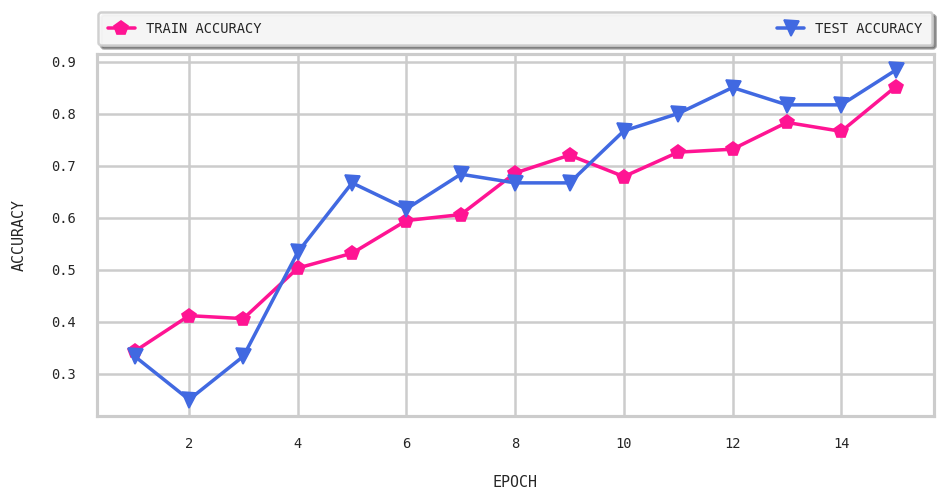

In [10]:
#PLOTTING ACCURACY VALUES

plt.figure(figsize=(9,4),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
l1=plt.plot(epoch,acc,label="TRAIN ACCURACY")
l2=plt.plot(epoch,val_acu,label="TEST ACCURACY")

plt.setp(l1,color='deeppink',marker="p",linewidth=2.1)
plt.setp(l2,color='royalblue',marker="v",linewidth=2.1)

plt.xlabel('\nEPOCH')
plt.ylabel('ACCURACY\n')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)

plt.show()

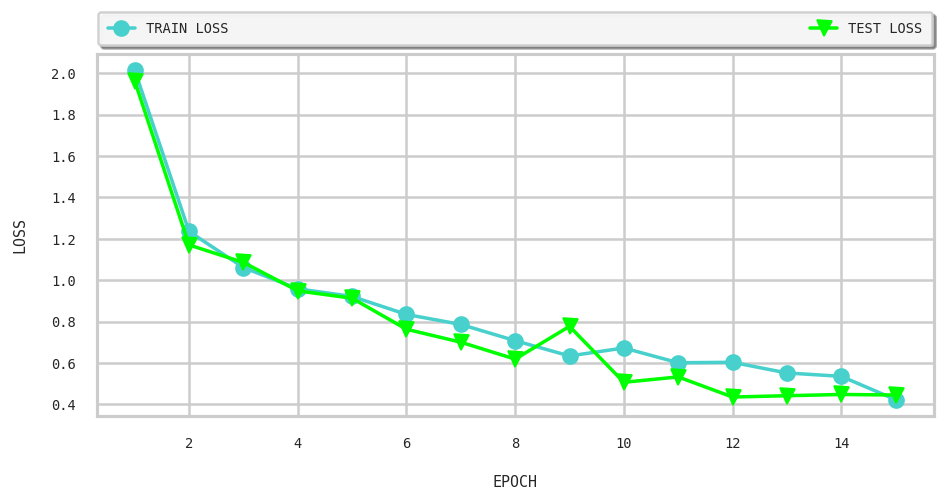

In [11]:
#PLOTTING LOSS VALUES
plt.figure(figsize=(9,4),dpi=120)
sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=0.5)
l1=plt.plot(epoch,loss,label="TRAIN LOSS")
l2=plt.plot(epoch,valid_loss,label="TEST LOSS")

plt.setp(l1,color='mediumturquoise',marker="o",linewidth=2.1)
plt.setp(l2,color='lime',marker="v",linewidth=2.1)

plt.xlabel('\nEPOCH')
plt.ylabel('LOSS\n')
plt.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.7,bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.1)

plt.show()

In [12]:
#saving the model
model.save("amazon_augmented_cnn.h5")

In [13]:
#visualization of filters generated by convolutional layer
#checking details of different layers implemented in the model
lay=model.layers
lay

Layer= LAYER_1 
Shape= (3, 3, 1, 32)

weights= [[[[ 0.71997464 -0.37255397 -0.2724919   0.5531057  -0.12912318
    -0.28719914  0.39138505  0.49421987 -0.6821712   0.51982665
    -0.1655531   0.66658735 -0.53052396  0.07804776 -0.54855764
    -0.67119     0.25557378 -0.61206895  0.75305605 -0.30267888
    -0.5357092  -0.5248893   0.63548225  0.24096803 -0.34480235
    -0.1586373  -0.3978622   0.43852785  0.37393218 -0.13872157
    -0.3167127   0.75606704]]

  [[ 0.23077919  0.36262593  0.67951953 -0.02430644 -0.2982668
    -0.6589351   0.50866187  0.79603595 -0.6032641  -0.18047374
     0.40892908 -0.02801365  0.26900828  0.5486699  -0.32511136
     0.61112255  0.63978463 -0.05877078  0.44823402 -0.14493245
    -0.70697856  0.4164446  -0.4447238  -0.5061276   0.38753352
     0.23259847 -0.2032029  -0.14535235 -0.25155145 -0.1893887
     0.4646812  -0.62597734]]

  [[ 0.74185467  0.00852168  0.39274865 -0.62137485  0.14289157
    -0.677099   -0.3413486   0.44347364 -0.13973923 -0.619796

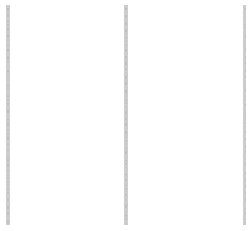

Layer= LAYER_2 
Shape= (3, 3, 32, 32)

weights= [[[[-0.14097127 -0.04710267 -0.02009818 ...  0.0620199   0.00849255
     0.02346829]
   [-0.00578384  0.11919289  0.10788055 ...  0.02198356 -0.06685292
     0.08864567]
   [-0.06458816  0.02221755 -0.04078251 ...  0.0898955   0.10326196
    -0.12904252]
   ...
   [-0.13677204 -0.10639594 -0.07071884 ... -0.02400597 -0.04361502
     0.05736255]
   [ 0.10349318  0.04259217 -0.00755934 ... -0.02834737  0.00521982
    -0.08483927]
   [-0.10343928  0.03149507  0.05843124 ... -0.14750643  0.11956487
     0.02577359]]

  [[ 0.10667516 -0.13935845 -0.05634774 ...  0.04816744 -0.02691785
    -0.02193197]
   [ 0.11723196  0.00362407  0.01608445 ... -0.01549966  0.03751633
     0.04213702]
   [-0.05658289  0.14410996 -0.02027965 ...  0.01589321 -0.07281213
    -0.0288845 ]
   ...
   [ 0.02152196 -0.00468722 -0.06030198 ...  0.01722663 -0.01976291
    -0.07920668]
   [-0.0565608  -0.13165662  0.08127945 ...  0.11637613 -0.10934907
    -0.14000075]
 

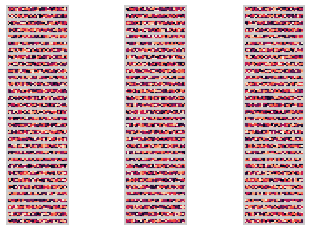

Layer= LAYER_3 
Shape= (3, 3, 32, 64)

weights= [[[[ 0.10001367 -0.0039225   0.0303337  ... -0.1160868  -0.09759313
     0.07241633]
   [ 0.04223895 -0.07693098 -0.08589741 ...  0.04501001  0.14356236
    -0.04955699]
   [-0.09126914  0.03754022  0.07805799 ... -0.03441472 -0.14414081
     0.04654436]
   ...
   [-0.11150991  0.01590907 -0.10726749 ... -0.0201226  -0.02226518
    -0.05095273]
   [-0.09439269  0.10351542 -0.05710734 ...  0.08240043  0.08128111
     0.08511895]
   [ 0.06094398  0.04838305 -0.03023075 ...  0.08633978 -0.02618343
    -0.13942382]]

  [[-0.11949699 -0.11864705 -0.08651139 ... -0.01968556 -0.02263264
     0.05211802]
   [-0.01016809 -0.01848253  0.07514314 ... -0.0624994   0.10771168
    -0.08557768]
   [-0.07228974  0.11359403  0.07608884 ...  0.12477413  0.02856854
    -0.06806127]
   ...
   [ 0.05708309  0.01351447 -0.0985194  ... -0.01502217  0.10923935
    -0.08698963]
   [ 0.07211309 -0.143603   -0.08011501 ... -0.11518114  0.02663397
     0.09391915]
 

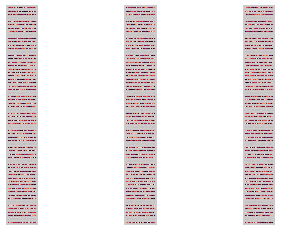

In [14]:
#visualization of filters generated by convolutional layer
#searching for convolutional layers in the layers to obtain the weights and bias used
#will seacrh for name LAYER as my conv were named LAYER

for layer in lay:
    if 'LAYER' in layer.name:
        weights, bias= layer.get_weights()
        print("Layer=",layer.name,"\nShape=", weights.shape)
        print("\nweights=",weights)
        
 #normalizing the value of weight obtained in a range of  0 and 1 for proper visualization
        weight_min= weights.min()
        weight_max =  weights.max()
        print("Maxm=",weight_max,'\nMinm=',weight_min)
        filters = (weights - weight_min) / (weight_max - weight_min)  
        print(filters.shape[3])
        filter_cnt=1
  #plotting all the filters
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]

            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,j])
                filter_cnt+=1
        plt.show()
  